In [1]:
# native
import os, sys
import pandas as pd 
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# local
sys.path.append("..")
from data.loader import SimulatedSpectralData
from data.splitter import Splitter

def make_visdf(X, y, seasons):
    df = pd.DataFrame(X).reset_index()
    df["season"] = seasons
    df["y"] = y
    df["y_cls"] = y > np.median(y)
    df = df.melt(id_vars=["index", "season", "y_cls", "y"], var_name="spectra", value_name="reflectance")
    return df

In [2]:
n = 30
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
Tu = spectral_data.Tu
Pu = spectral_data.Pu
Xu = spectral_data.Xu
Td = spectral_data.Td
Pd = spectral_data.Pd
Xd = spectral_data.Xd
X = spectral_data.X
y = spectral_data.y

Effect 0: 1 on component 0
Effect 1: 1.08 on component 1
Effect 2: 1.05 on component 0
Effect 0: 1.05 on component 0
Effect 1: 1 on component 1
Effect 2: 1 on component 0
Linear effects:  [280 107 233]
Non-linear effects:  [ 20  41 226 170 136 116  72]


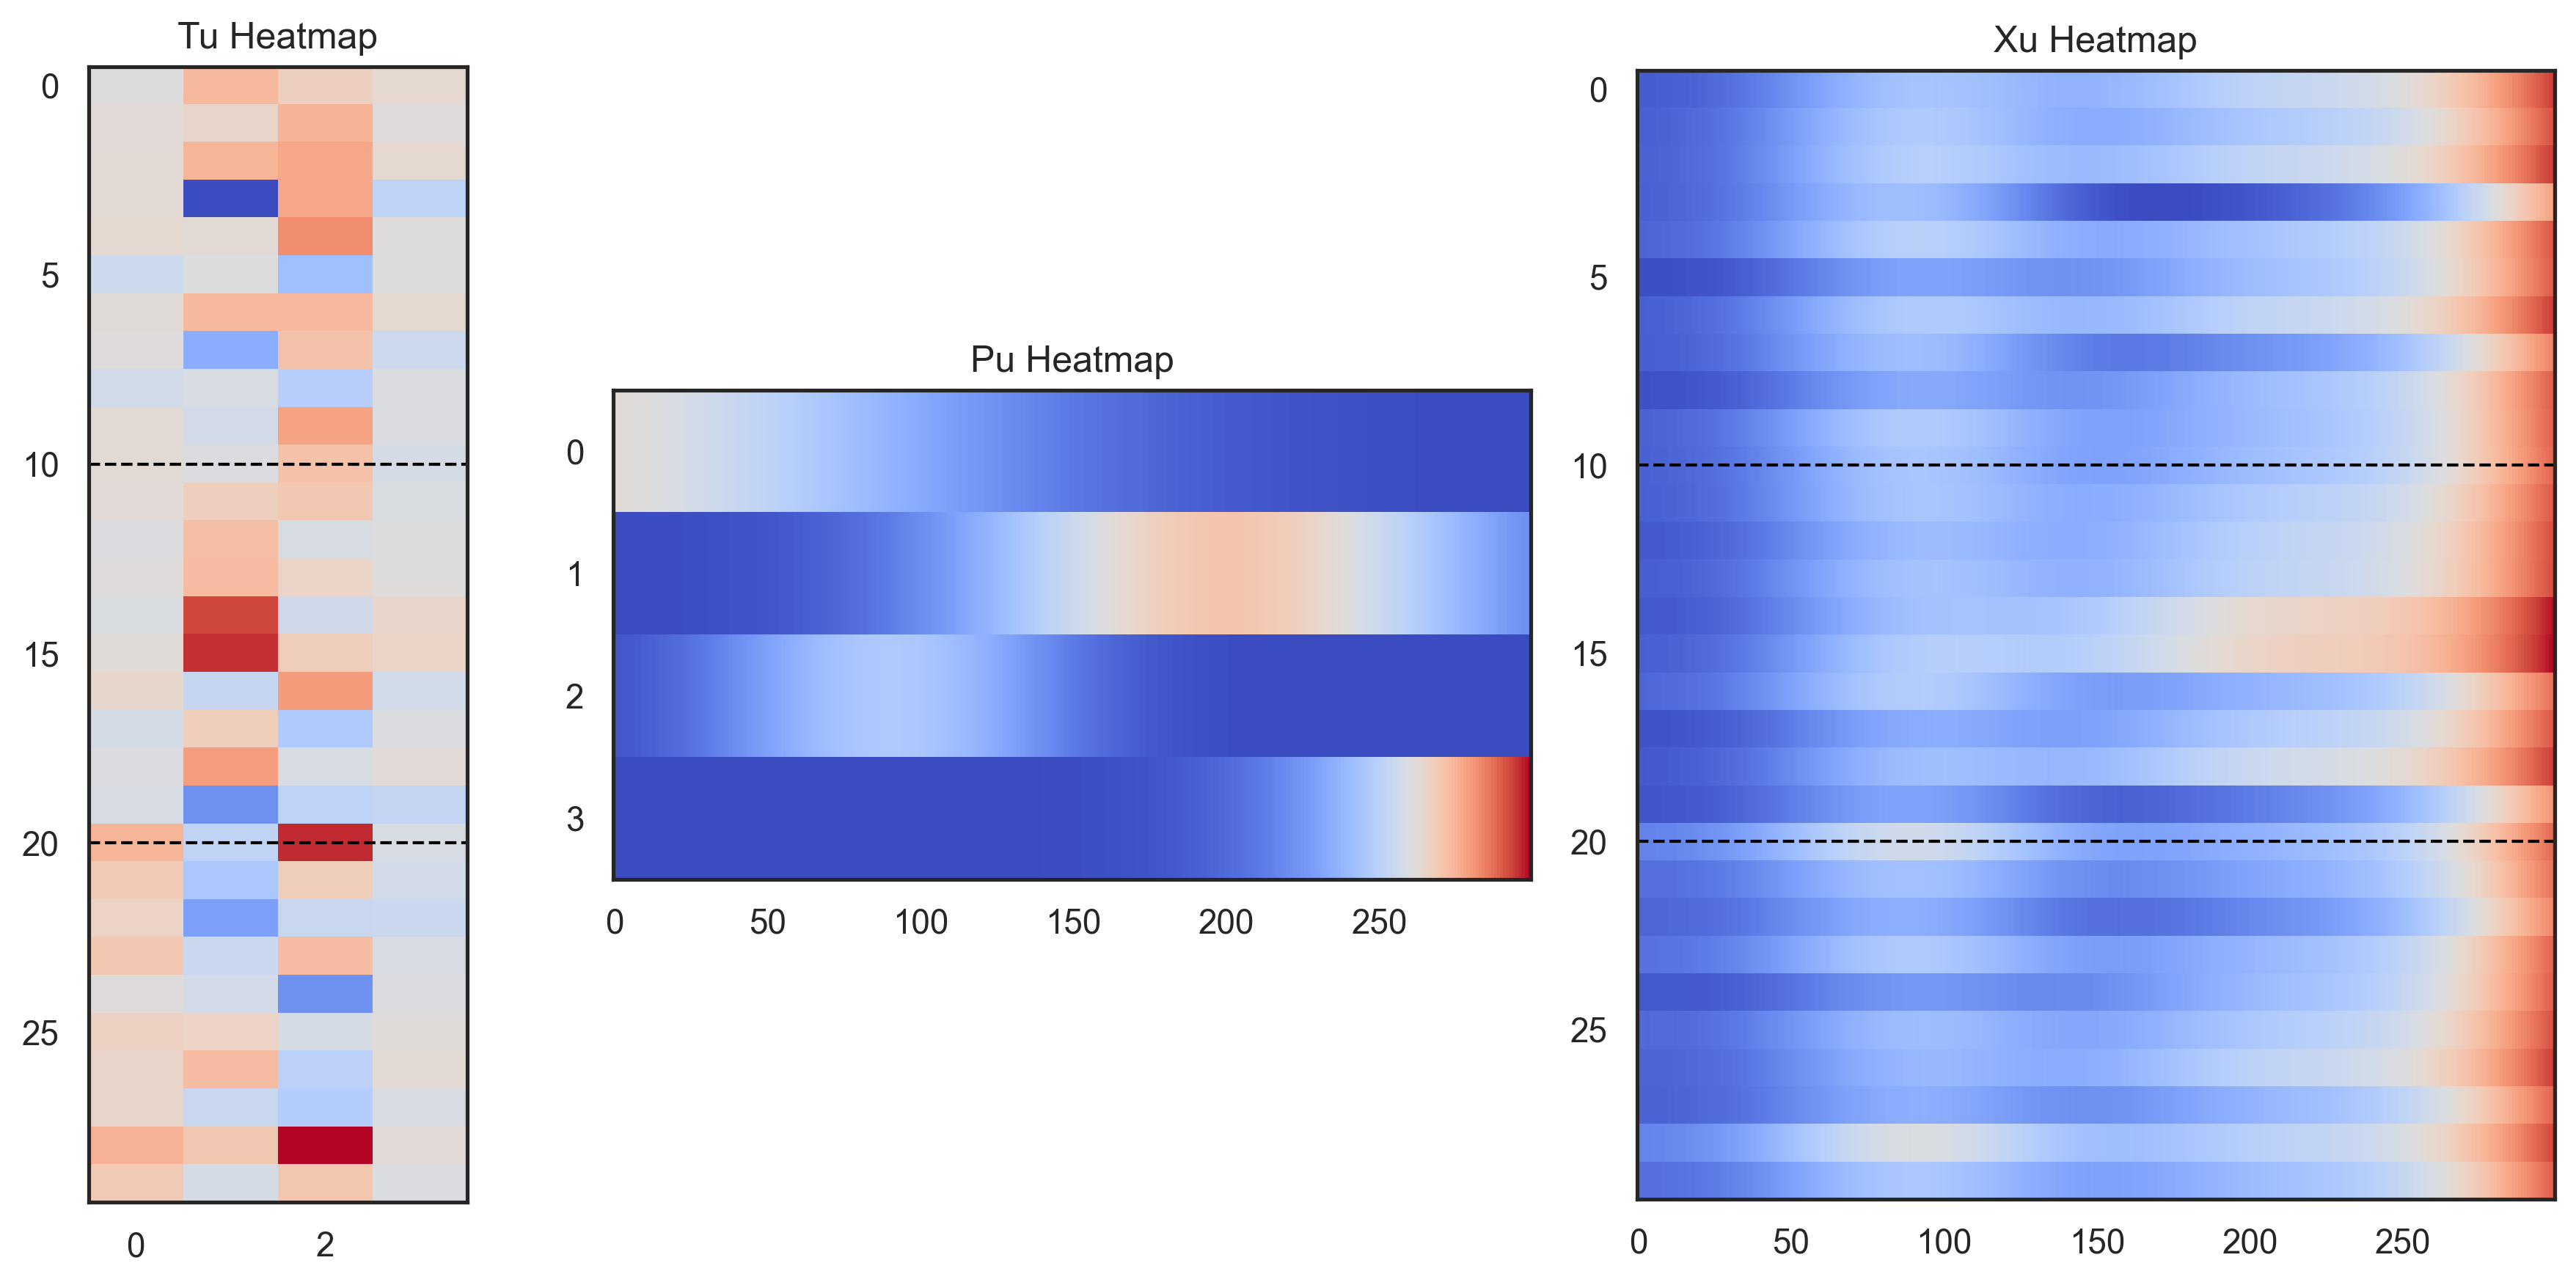

In [4]:
sns.set(style="white")

fig, axes = plt.subplots(nrows=1, ncols=3, 
                        dpi=300,
                        figsize=(12, 6),
                        gridspec_kw={'width_ratios': [1, 2, 2]})

T = np.concatenate((Tu, Td), axis=1)
P = np.concatenate((Pu, Pd), axis=0)

axes[0].imshow(T, cmap='coolwarm', aspect=1/2.5, interpolation="None")
axes[1].imshow(P, cmap='coolwarm', aspect=40, interpolation="None")
axes[2].imshow(X, cmap='coolwarm',  aspect=12.3, interpolation="None")

# First subplot (Tu)
axes[0].axhline(10, color='black', linewidth=1, linestyle='--')
axes[0].axhline(20, color='black', linewidth=1, linestyle='--')
axes[0].set_title("Tu Heatmap")
# Second subplot (Pu)
axes[1].set_xticks(np.arange(0, Pd.shape[1], step=50))
axes[1].set_title("Pu Heatmap")
# Xu
axes[2].axhline(10, color='black', linewidth=1, linestyle='--')
axes[2].axhline(20, color='black', linewidth=1, linestyle='--')
axes[2].set_xticks(np.arange(0, Xd.shape[1], step=50))
axes[2].set_title("Xu Heatmap")

plt.tight_layout()
plt.show()

In [5]:
n_eff = n // 3
seasons = ["summer"] * n_eff + ["fall"] * n_eff + ["winter"] * n_eff
df_u = make_visdf(Xu, y, seasons)
df_d = make_visdf(Xd, y, seasons)
df = make_visdf(X, y, seasons)

<Axes: xlabel='spectra', ylabel='reflectance'>

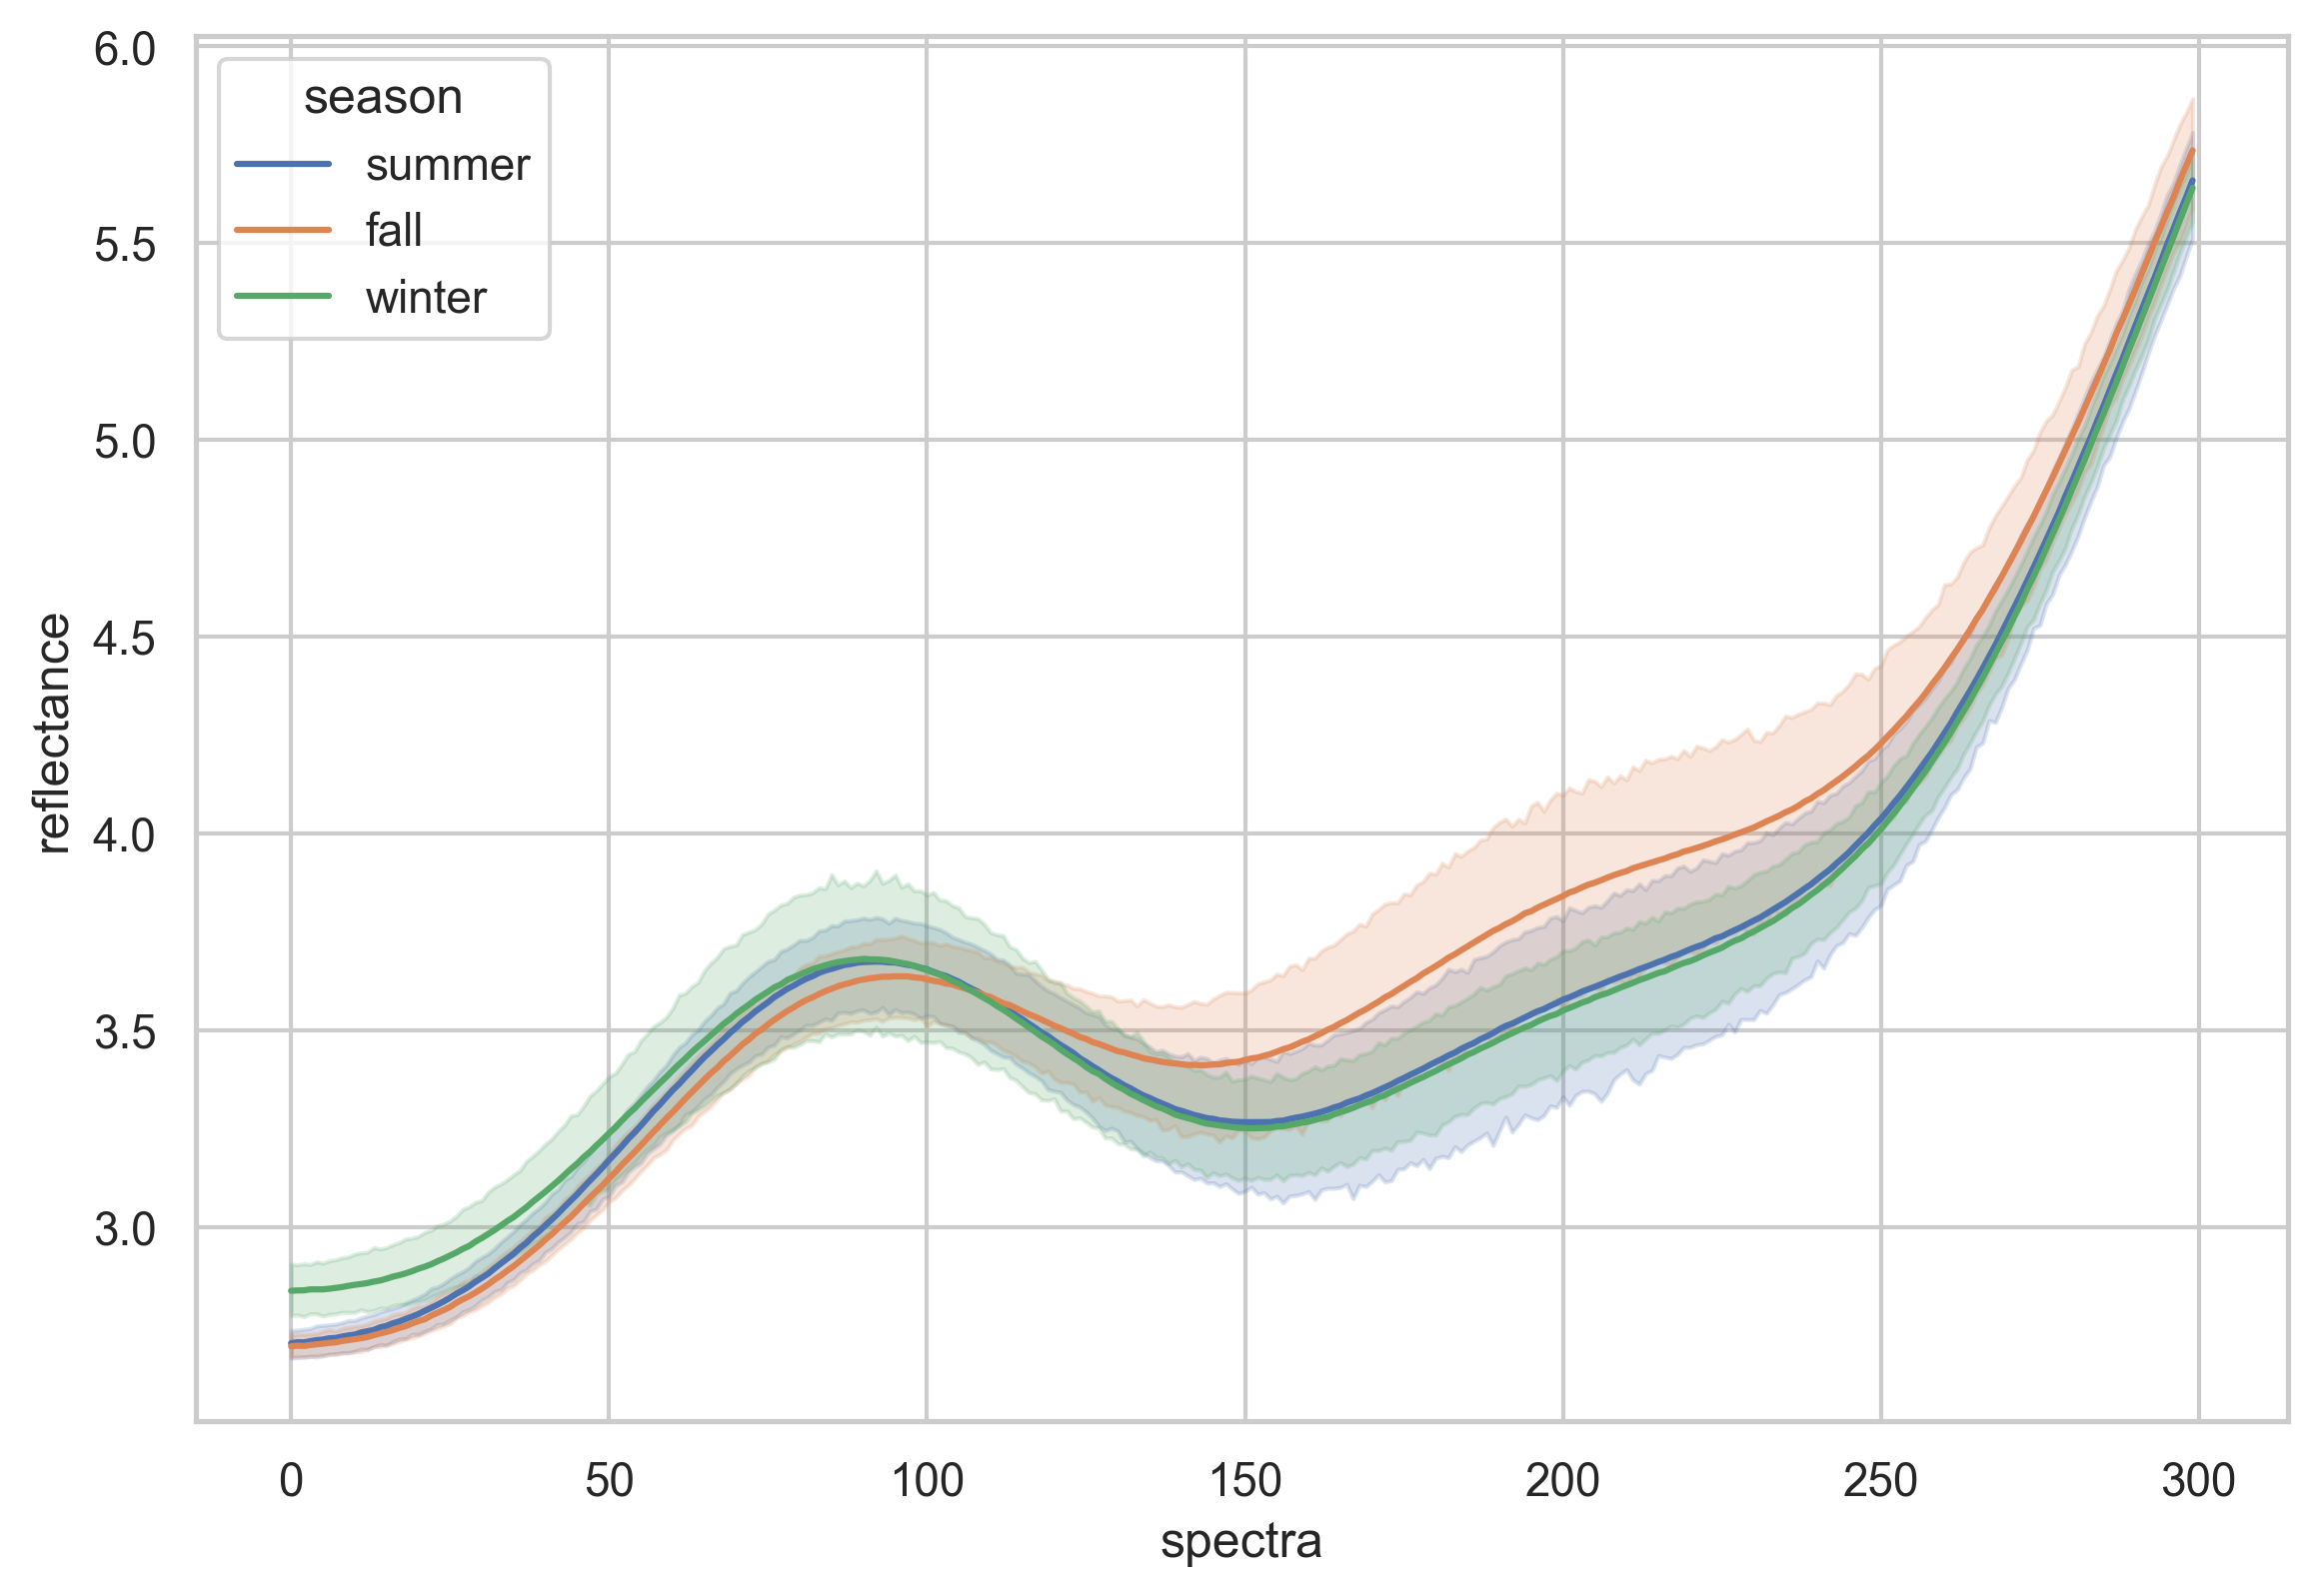

In [6]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#DC3977"]
plt.figure(figsize=(9, 6), dpi=300)
sns.lineplot(x="spectra", y="reflectance", hue="season", data=df)

Effect 0: 1 on component 0
Effect 1: 1.08 on component 1
Effect 2: 1.05 on component 0
Effect 0: 1.05 on component 0
Effect 1: 1 on component 1
Effect 2: 1 on component 0
Linear effects:  [280 107 233]
Non-linear effects:  [ 20  41 226 170 136 116  72]


<Figure size 2700x1800 with 0 Axes>

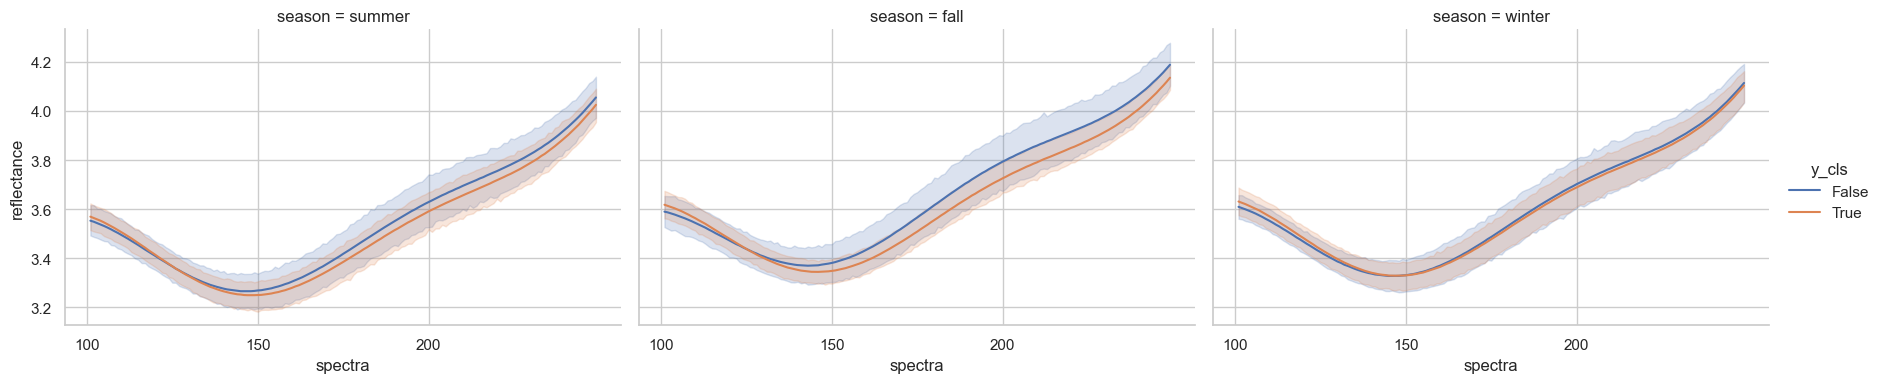

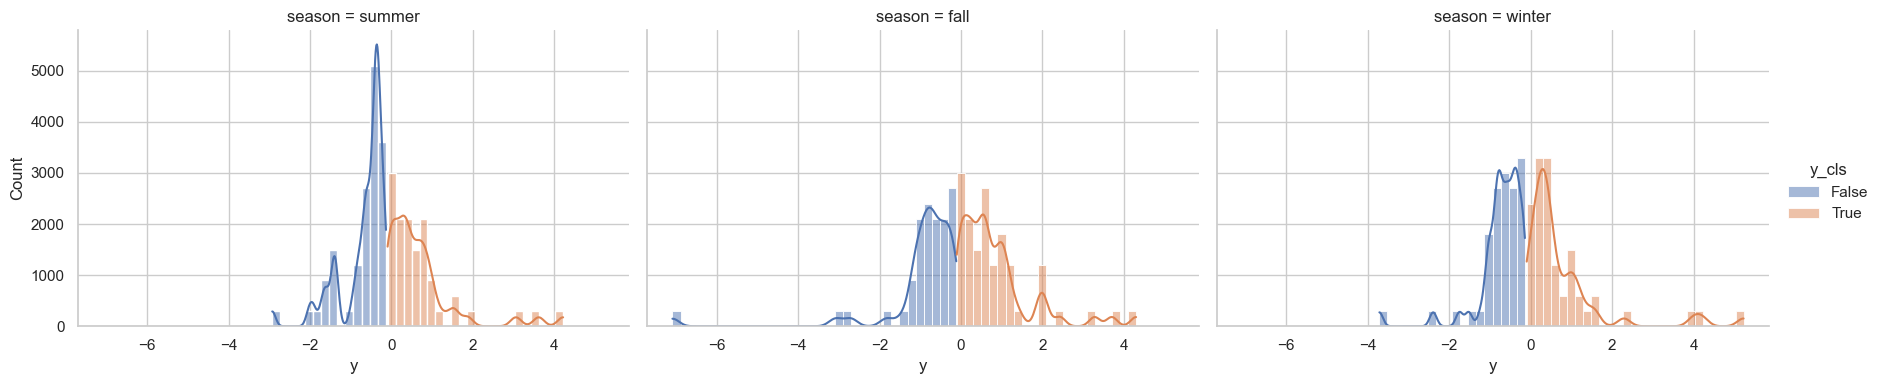

In [16]:
n = 300
spectral_data = SimulatedSpectralData()
X, y = spectral_data.sample(n, seed=24061)
n_eff = n // 3
ls_season = ["summer", "fall", "winter"]
seasons = [ls_season[i % 3] for i in range(n)]

df = make_visdf(X, y, seasons)
df["spectra"] = df["spectra"].astype(int)
param = {"aspect": 1.5, "height": 4, "hue": "y_cls"}

sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6), dpi=300)
g = sns.FacetGrid(df.query("spectra < 250 and spectra > 100"),
    col="season", col_order=ls_season, 
    **param)
g.set(xticks=[i for i in range(100, 250, 50)])
g.set_xlabels("Spectral Band")
g.set_ylabels("Reflectance")
g.map(sns.lineplot, "spectra", "reflectance")
g.add_legend()

g = sns.FacetGrid(df,
    col="season", col_order=ls_season, 
    **param)
g.map(sns.histplot, "y", kde=True, binwidth=0.2)
g.add_legend()

<Axes: >

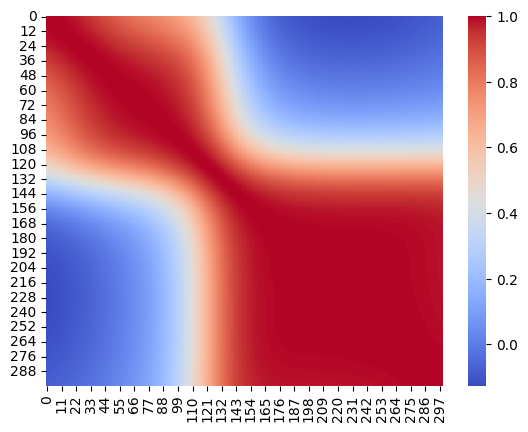

In [ ]:
cor_X = pd.DataFrame(X).corr()
sns.heatmap(cor_X, cmap="coolwarm", linecolor='black')

In [150]:
data_grouped = df.groupby(["season", "y_cls"]).agg(
    count=("index", "count"),
    mean=("y", "mean"),
    median=("y", "median"),
    std=("y", "std")
).reset_index()
data_grouped

,season,y_cls,count,mean,median,std
0,fall,False,2100,-0.829208,-0.590877,0.424877
1,fall,True,900,0.178659,0.020600,0.313005
2,summer,False,900,-0.819561,-0.888881,0.167575
3,summer,True,2100,1.190945,0.220309,1.619899
4,winter,False,1500,-0.672774,-0.582579,0.328555
5,winter,True,1500,0.234118,0.190541,0.318136


/var/folders/0k/_fn4_dgn04b2b44_sfhbshzr0000gp/T/ipykernel_34208/2593031408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ft.loc[:, "y"] = y


<Axes: >

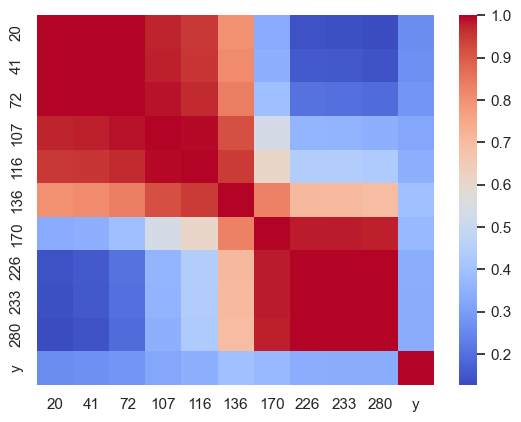

In [110]:
idx_lienar = [280, 107, 233]
idx_nonlinear = [20, 41, 226, 170, 136, 116, 72]
idx = idx_lienar + idx_nonlinear
idx.sort()
dfX = pd.DataFrame(X)
X_ft = dfX.iloc[:, idx]
X_ft.loc[:, "y"] = y
corr = X_ft[20:30].corr()
sns.heatmap(corr, cmap='coolwarm')

In [11]:
def make_visdf(X, y, seasons):
    df = pd.DataFrame(X).reset_index()
    df["season"] = seasons
    df["y_cls"] = y > np.median(y)
    df = df.melt(id_vars=["index", "season", "y_cls"], var_name="spectra", value_name="reflectance")
    return df

def plot_X(X, effects):
    df = pd.DataFrame(X).reset_index()
    df["effects"] = effects
    df = df.melt(id_vars=["index", "effects"], 
                 var_name="band", value_name="intensity")
    sns.lineplot(data=df, x="band", y="intensity", hue="effects")

In [ ]:
sns.lineplot(x="spectra", y="reflectance", hue="season", data=df)
sns.lineplot(x="spectra", y="reflectance", hue="y_cls", data=df)

In [ ]:
n, p = X.shape
n_effect = n // 3
effects = ["summer"] * n_effect + ["fall"] * n_effect + ["winter"] * n_effect
plot_X(X, effects=effects)

In [ ]:
corX = pd.DataFrame(X).corr()
sns.heatmap(corX, cmap="coolwarm", center=0, square=True)

In [ ]:
idx_select = [0, 20, 41, 50, 100, 150, 200, 226, 250, 280]
Xs = X[:, idx_select]
plot_X(Xs, effects=effects)